# Quiz 5 - CNN and Bag of Features for object recognition

**Brian Acevedo**

**Eugenio Pacceli**

**Renato Oliveira**

# Bag of features with SVM for CIFAR10 dataset

In [ ]:
import cv2
from sklearn.cluster import KMeans
from sklearn.svm import SVC
import numpy as np
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils


if __name__=="__main__": 
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    sift = cv2.xfeatures2d.SIFT_create() #Uses SIFT to get descriptors
    descritores = [] 
   

    #Extract descritors for all imagens on the dataset
    for i in np.arange(x_train.shape[0]):
        _,imgDesc = sift.detectAndCompute(x_train[i],None)
        if imgDesc is not None:
            for j in np.arange(imgDesc.shape[0]):
                descritores.append(imgDesc[j])

    descritores = np.array(descritores)
    print("Calculando centroides a partir dos descritores")

    #Apply KMeans to descriptors list to generate 10 centroids corresponding to the 10 visual words
    kmeans = KMeans(n_clusters=10).fit(descritores)

    treino_hist_X=[]
    treino_hist_Y=[]
    print("Calculando histogramas para as imagens do treino")

    #For each descriptor of an image, find the closest centroid
    #This return a vector with the number of each centroid for each descriptor of an image
    #Create an histogram out of acho vector for each imagem
    #Associate a label for each histogram
    for i in np.arange(x_train.shape[0]):
         _,imgDesc = sift.detectAndCompute(x_train[i],None)
         if imgDesc is not None:
             kcent = kmeans.predict(imgDesc) #Calcula centroide pada cada descritor
             hist,_ = np.histogram(kcent,bins=[0,1,2,3,4,5,6,7,8,9,10],normed=True)
             treino_hist_X.append(hist)
             treino_hist_Y.append(y_train[i])


    treino_hist_X = np.array(treino_hist_X).reshape((-1,10))
    treino_hist_Y = np.array(treino_hist_Y).reshape((-1,))


    #Train SVM classifier with histogram and label pairs from the training set
    
    modSVM = SVC()
    modSVM.fit(treino_hist_X,treino_hist_Y.reshape((-1,)))

    matriz_conf_teste = np.zeros((10,10))

    #Aplly SVM on the test set
    #Extract descriptor for each image
    #Find closest centroid
    #Create histogram for each image
    #Predict category with the SVM classifiear
    #Add error or hit on the confusion matrix
    #Lines correspond to true labels and columns correspond to predictions from the SVM classifier
    preds=[]
    labels=[]
    for i in np.arange(x_test.shape[0]):
         _,imgDesc = sift.detectAndCompute(x_test[i],None)
         if imgDesc is not None:
             kcent = kmeans.predict(imgDesc) #Calcula centroide pada cada descritor
             hist,_ = np.histogram(kcent,bins=[0,1,2,3,4,5,6,7,8,9,10],normed=True)
             ret = modSVM.predict(hist.reshape((1,-1)))[0]
             preds.append(ret)
             labels.append(y_test[i,0])
             real = y_test[i,0]
             matriz_conf_teste[real,ret] = matriz_conf_teste[real,ret] + 1

    print("accuracy is {0}".format(accuracy_score(labels,preds)))
    plt.pcolor(matriz_conf_teste,cmap="jet")
    plt.colorbar()
    plt.title("Confusion Matrix - Test Set")


# Lenet 5 for CIFAR10 dataset

In [2]:


(x_train, y_train), (x_test, y_test) = cifar10.load_data() #utliza o dataset cifar10 do keras

nb_classes = 10
nb_epoch=200
batch_size=32

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

in_shape=x_train.shape[1:]

y_train = np_utils.to_categorical(y_train, nb_classes)

model = Sequential()

model.add(Conv2D(12, (5, 5), activation = 'relu', input_shape=in_shape, init='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(25, (5, 5), activation = 'relu', init='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D output to 1D tensor for a fully connected layer to accept the input
model.add(Flatten())
model.add(Dense(180, activation = 'relu', init='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(100, activation = 'relu', init='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation = 'softmax', init='he_normal')) #Last layer with one output per class

model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch, verbose=2)

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (5, 5), input_shape=(32, 32, 3..., kernel_initializer="he_normal", activation="relu")`
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(25, (5, 5), kernel_initializer="he_normal", activation="relu")`
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(180, kernel_initializer="he_normal", activation="relu")`
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, kernel_initializer="he_normal", activation="relu")`
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Update your `Dense` call to t

Epoch 1/200
13s - loss: 1.8041 - acc: 0.3234
Epoch 2/200
12s - loss: 1.5206 - acc: 0.4456
Epoch 3/200
13s - loss: 1.4021 - acc: 0.4976
Epoch 4/200
12s - loss: 1.3266 - acc: 0.5282
Epoch 5/200
14s - loss: 1.2673 - acc: 0.5529
Epoch 6/200
14s - loss: 1.2163 - acc: 0.5737
Epoch 7/200
13s - loss: 1.1723 - acc: 0.5903
Epoch 8/200
13s - loss: 1.1340 - acc: 0.6059
Epoch 9/200
12s - loss: 1.1021 - acc: 0.6170
Epoch 10/200
13s - loss: 1.0729 - acc: 0.6266
Epoch 11/200
14s - loss: 1.0487 - acc: 0.6379
Epoch 12/200
13s - loss: 1.0255 - acc: 0.6457
Epoch 13/200
14s - loss: 1.0039 - acc: 0.6535
Epoch 14/200
14s - loss: 0.9881 - acc: 0.6610
Epoch 15/200
15s - loss: 0.9658 - acc: 0.6669
Epoch 16/200
12s - loss: 0.9457 - acc: 0.6742
Epoch 17/200
14s - loss: 0.9260 - acc: 0.6787
Epoch 18/200
13s - loss: 0.9130 - acc: 0.6823
Epoch 19/200
13s - loss: 0.8973 - acc: 0.6899
Epoch 20/200
13s - loss: 0.8837 - acc: 0.6960
Epoch 21/200
13s - loss: 0.8685 - acc: 0.7014
Epoch 22/200
12s - loss: 0.8631 - acc: 0.70

13s - loss: 0.4148 - acc: 0.8515
Epoch 179/200
14s - loss: 0.4120 - acc: 0.8513
Epoch 180/200
14s - loss: 0.4111 - acc: 0.8524
Epoch 181/200
13s - loss: 0.4141 - acc: 0.8505
Epoch 182/200
14s - loss: 0.4154 - acc: 0.8524
Epoch 183/200
13s - loss: 0.4106 - acc: 0.8531
Epoch 184/200
14s - loss: 0.4092 - acc: 0.8543
Epoch 185/200
14s - loss: 0.4148 - acc: 0.8527
Epoch 186/200
12s - loss: 0.4123 - acc: 0.8524
Epoch 187/200
12s - loss: 0.4077 - acc: 0.8527
Epoch 188/200
13s - loss: 0.4006 - acc: 0.8566
Epoch 189/200
13s - loss: 0.4094 - acc: 0.8531
Epoch 190/200
13s - loss: 0.4075 - acc: 0.8547
Epoch 191/200
14s - loss: 0.4055 - acc: 0.8560
Epoch 192/200
14s - loss: 0.4017 - acc: 0.8566
Epoch 193/200
12s - loss: 0.4019 - acc: 0.8550
Epoch 194/200
13s - loss: 0.4071 - acc: 0.8544
Epoch 195/200
13s - loss: 0.4086 - acc: 0.8520
Epoch 196/200
13s - loss: 0.4025 - acc: 0.8550
Epoch 197/200
11s - loss: 0.4101 - acc: 0.8545
Epoch 198/200
10s - loss: 0.4083 - acc: 0.8551
Epoch 199/200
10s - loss: 0

 9344/10000 [===========================>..] - ETA: 0s - Accuracy on test dataset 0.681


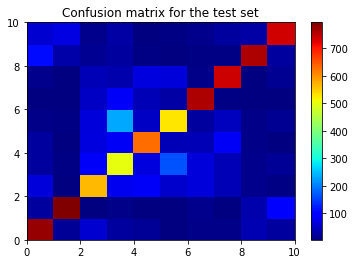

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

resp = model.predict_classes(x_test)

respLab = []
for i in range(0,len(y_test)):
    respLab.append(y_test[i][0])

mat_conf_teste = np.zeros((10,10))

print(" - Accuracy on test dataset {0}".format(accuracy_score(resp,respLab)))

for i in np.arange(resp.shape[0]):
    mat_conf_teste[respLab[i],resp[i]] = mat_conf_teste[respLab[i],resp[i]] + 1

plt.pcolor(mat_conf_teste,cmap="jet")
plt.colorbar()
plt.title("Confusion matrix for the test set")

49504/50000 [============================>.] - ETA: 0sAccuracy on training dataset 0.96358


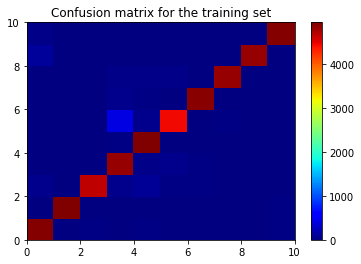

In [71]:
resp = model.predict_classes(x_train)

respLab = []

for i in range(0,len(y_train)):
    respLab.append(np.where(y_train[i] ==1)[0])

mat_conf_treino = np.zeros((10,10))

print("Accuracy on training dataset {0}".format(accuracy_score(respLab,resp)))

for i in np.arange(resp.shape[0]):
    mat_conf_treino[respLab[i],resp[i]] = mat_conf_treino[respLab[i],resp[i]] + 1

plt.pcolor(mat_conf_treino,cmap="jet")
plt.colorbar()
plt.title("Confusion matrix for the training set")